# Reviews: Sentiment Analysis and Clustering

# Start with installing and importing necessary packages

In [3]:
pip install xgboost


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [5]:
# Load the dataset
data = pd.read_csv('C:/Users/opeye/Desktop/Python/tripadvisor_hotel_reviews/tripadvisor_hotel_reviews.csv')

In [6]:
data.head(15)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [6]:
# This imports the NLTK library, which is a popular Python library 
# for working with human language data (text data).

import nltk


In [7]:
#This imports the SentimentIntensityAnalyzer class from the NLTK's
#VADER (Valence Aware Dictionary and sEntiment Reasoner) module. VADER is a lexicon and rule-based 
#sentiment analysis tool specifically designed for social media text.

from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [8]:
#This imports the stopwords corpus from NLTK.Stopwords are common words (like "and," "the," "is," etc.) 
#that are often removed from text during preprocessing because they don't typically carry meaningful 
#information.


from nltk.corpus import stopwords


In [9]:
#This imports the word_tokenize function from NLTK. 
#Word tokenization is the process of splitting a sentence or
#paragraph into individual words.

from nltk.tokenize import word_tokenize


In [10]:
#This imports the WordNetLemmatizer class from NLTK. 
#Lemmatization is the process of reducing words to their 
#base or root form. For example, "running" and "ran" both 
#become "run."

from nltk.stem import WordNetLemmatizer


In [11]:
#This downloads the stopwords dataset from NLTK. 
#You need to download this dataset once to use it.

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\opeye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
#This downloads the Open Multilingual WordNet (OMW) version 
#1.4 dataset. WordNet is a lexical database for the English 
#language, and OMW extends it to multiple languages.

nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\opeye\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
#This downloads the WordNet dataset. WordNet is a large 
#lexical database of English words and their relationships.

nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\opeye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
#This downloads the Punkt tokenizer models. 
#The Punkt tokenizer is used for tokenization, breaking 
#text into sentences and words.

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\opeye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# Rating distribution
# Check counts of all rating
#rating_counts = data['Rating'].value_counts()
rating_counts = data['Rating'].value_counts(normalize=True)

print(rating_counts)

5    0.441853
4    0.294715
3    0.106583
2    0.087502
1    0.069348
Name: Rating, dtype: float64


# Visualizing the Rating Distribution

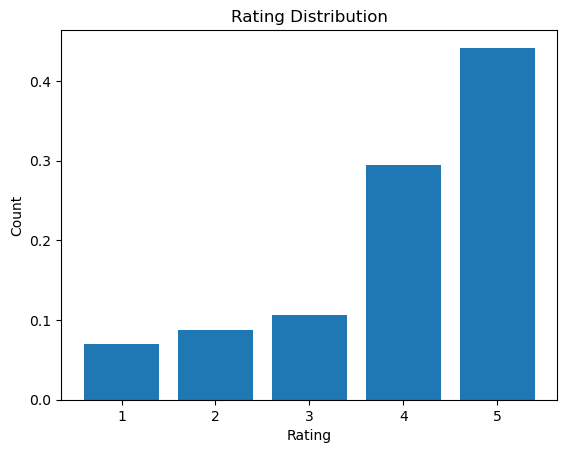

In [16]:

#using matplotlib

plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()


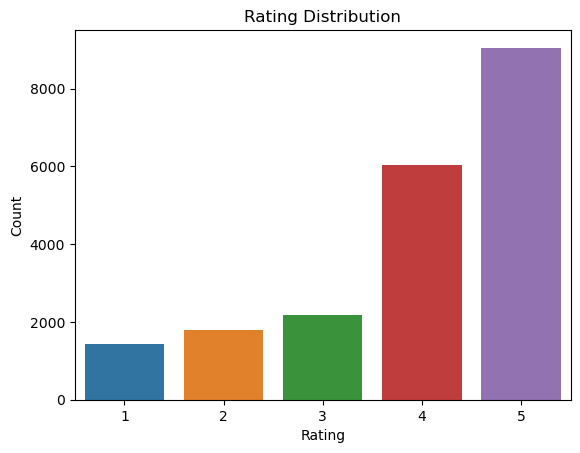

In [17]:
#Using seaborn

sns.countplot(data=data, x='Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()


# Review length

In [18]:
#Counting Characters

data['Length'] = data['Review'].apply(len)
data.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


In [19]:
#Counting Words

data['Length_words'] = data['Review'].apply(lambda x: len(str(x).split()))
data.head()

,Review,Rating,Length,Length_words
0,nice hotel expensive parking got good deal sta...,4,593,87
1,ok nothing special charge diamond member hilto...,2,1689,250
2,nice rooms not 4* experience hotel monaco seat...,3,1427,217
3,"unique, great stay, wonderful time hotel monac...",5,600,89
4,"great stay great stay, went seahawk game aweso...",5,1281,191


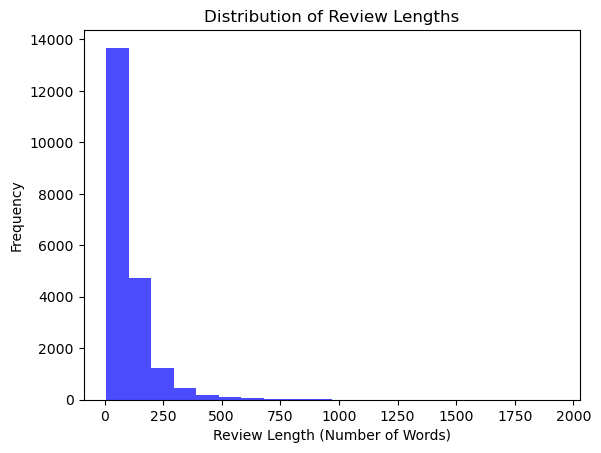

In [20]:
#distribution of review lengths using visualization libraries like Matplotlib or Seaborn

plt.hist(data['Length_words'], bins=20, alpha=0.7, color='blue')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()


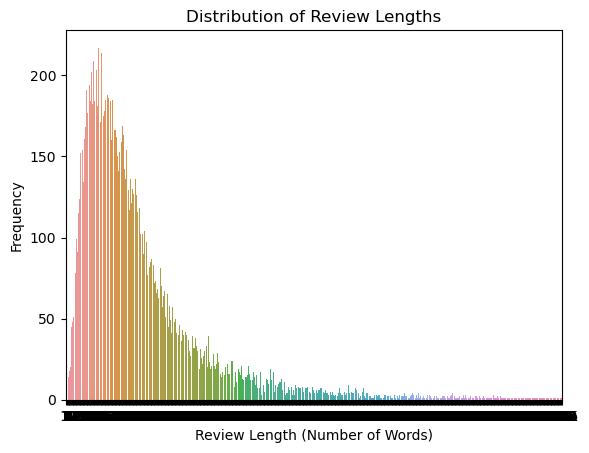

In [21]:
#Using seaborn

sns.countplot(data=data, x='Length_words')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()


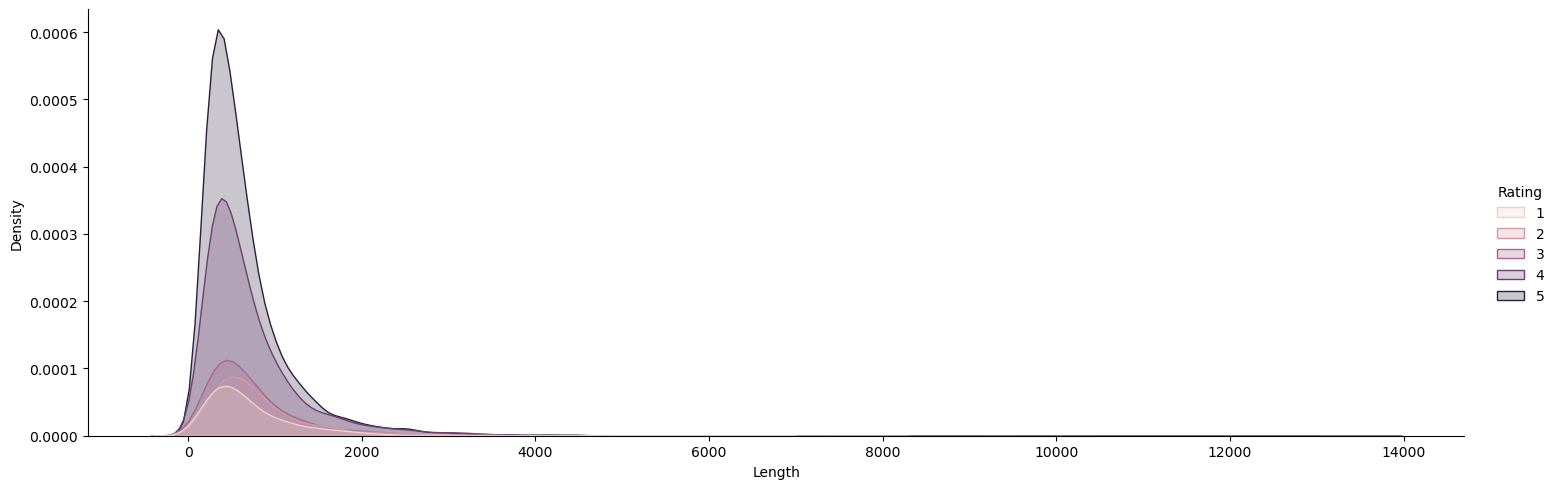

In [22]:
# Visualize length distribution based on the rating

sns.displot(data=data, x='Length', hue='Rating', kind='kde', fill=True, aspect=3)
plt.show()


# Text preprocessing

In [30]:
#import nltk
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from nltk.stem import WordNetLemmatizer
#import string

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a cleaned sentence
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


In [29]:
def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'(.)\1\1+', r"\1\1", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    tokens = word_tokenize(text)
    
     # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    tokens = [word for word in tokens if len(word) > 2]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
     # Join tokens back into a cleaned sentence
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply new function
data['Review'] = data['Review'].apply(clean_text)

In [33]:

data['Review'] = data['Review'].apply(clean_text)

# Print the first few cleaned reviews
for i in range(5):  # Print the first 5 reviews
    print("Cleaned Review", i+1, ":", data['Review'][i])


Cleaned Review 1 : nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non-existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music room night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night
Cleaned Review 2 : ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said thing like tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast got kidding embassy suit sitting room bathroom bedroom unlike kimpton call suite 5 d

In [30]:
#To find the most common words(20 most common words)

cleaned_reviews = ' '.join(data['Review'])  # Join all cleaned reviews into a single string

# Tokenize the cleaned reviews
tokens = cleaned_reviews.split()

# Use Counter to count the occurrences of each word
word_counts = Counter(tokens)

# Get the 20 most common words
most_common_words = word_counts.most_common(20)

print("20 Most Common Words:")
for word, count in most_common_words:
    print(word, ":", count)


20 Most Common Words:
hotel : 52900
room : 46357
great : 21095
good : 17060
staff : 16285
stay : 15339
night : 14073
day : 12952
time : 12601
nice : 12409
location : 11234
service : 10533
stayed : 10469
restaurant : 10090
beach : 10043
breakfast : 9654
place : 9381
clean : 9372
food : 9255
resort : 8918


In [36]:
#Alternatively

cleaned_reviews = ' '.join(data['Review']).lower() .split()  # Join all cleaned reviews into a single string

# Use Counter to count the occurrences of each word
word_counts = Counter(cleaned_reviews)

# Get the 20 most common words
most_common_words = word_counts.most_common(20)

print(most_common_words)



[('hotel', 52831), ('room', 46273), ('great', 21091), ("n't", 18987), ('good', 17030), ('staff', 16260), ('stay', 15323), ('night', 13732), ('day', 12719), ('time', 12583), ('nice', 12403), ('location', 11204), ('service', 10496), ('stayed', 10465), ('restaurant', 10065), ('beach', 10016), ('breakfast', 9643), ('place', 9371), ('clean', 9368), ('food', 9221)]


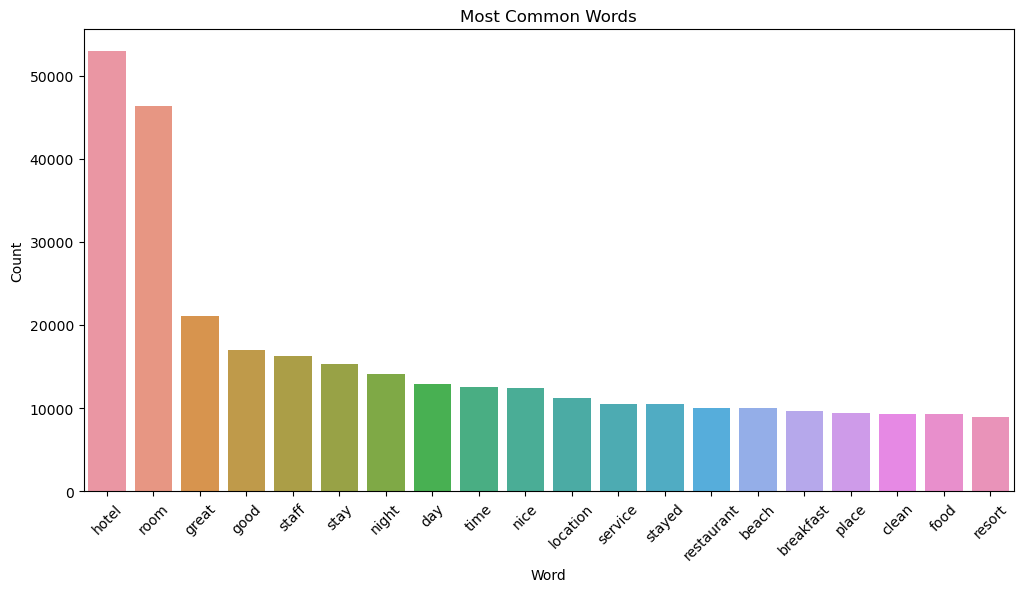

In [31]:
# Visualize most common words

# Convert the most common words and their counts into a DataFrame
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=most_common_df, x='Word', y='Count')
plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common Words')
plt.show()

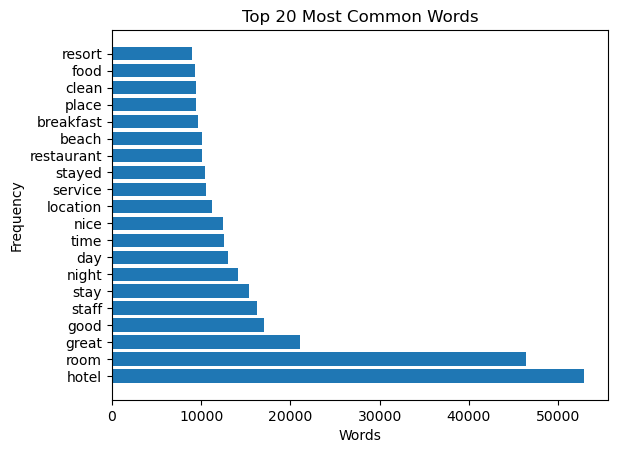

In [44]:
# Visualize most common words
fig, ax = plt.subplots()
ax.barh([word for (word, count) in most_common_words], [count for (word, count) in most_common_words])
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Top 20 Most Common Words')
plt.show()

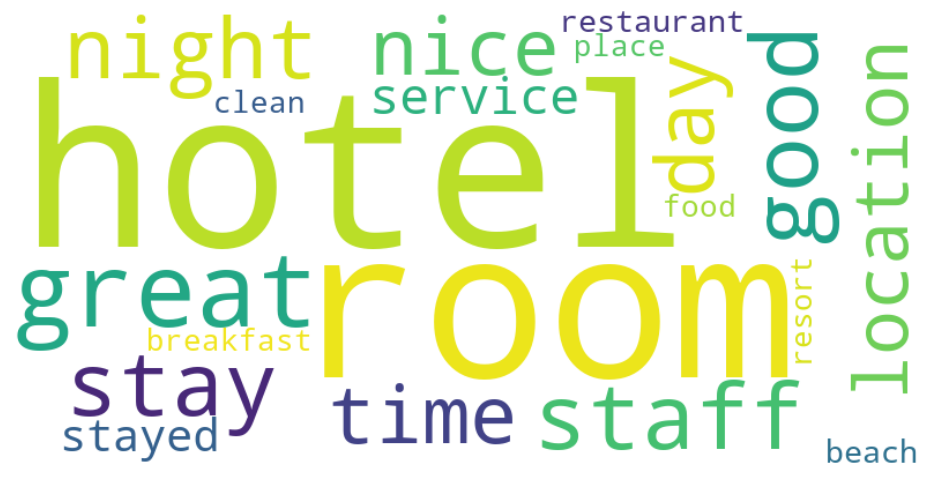

In [32]:
# Create a WordCloud object for the most common words
wordcloud = WordCloud(width=800, 
                      height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

# Display the word cloud using Matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title('Word Cloud of Most Common Words')
plt.show()


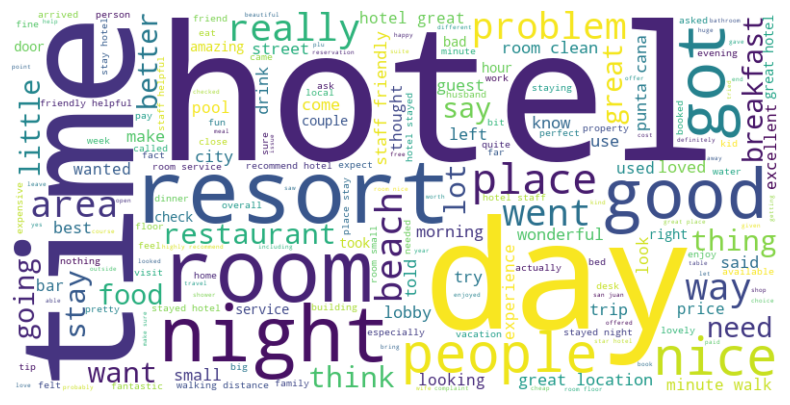

In [33]:
#from wordcloud import WordCloud
#import matplotlib.pyplot as plt


#cleaned_reviews = ' '.join(data['Review'])

# Create a WordCloud object for the cleaned reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_reviews)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title('Word Cloud of Most Common Words')
plt.show()


# Sentiment Analysis

In [ ]:
#We will use sentiment analysis to classify each review's sentiment as positive, negative, or neutral.
#And the results will be compared to the hotel's actual rating.

In [34]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
 



def classify_sentiment(review):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(review)
    
    # Analyze the compound sentiment score to classify sentiment
    sentiment_score = scores['compound']
    if sentiment_score > 0.1:
        return 'Positive'
    elif sentiment_score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'
    
    

# Apply function on dataset copy
data2 = data.copy()
data2['Predicted_Sentiment'] = data2['Review'].apply(classify_sentiment)

# Print the number of positive, negative, and neutral reviews
print("Number of positive reviews:", len(data2[data2['Predicted_Sentiment'] == 'Positive']))
print("Number of negative reviews:", len(data2[data2['Predicted_Sentiment'] == 'Negative']))
print("Number of neutral reviews:", len(data2[data2['Predicted_Sentiment'] == 'Neutral']))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\opeye\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Number of positive reviews: 19305
Number of negative reviews: 1045
Number of neutral reviews: 141


In [35]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(review):
    scores = sia.polarity_scores(review)
    sentiment_score = scores['compound']
    if sentiment_score > 0.1:
        return 'positive'
    elif sentiment_score < -0.1:
        return 'negative'
    else:
        return 'neutral'
    
# Apply function on dataset copy
data2 = data.copy()
data2['Predicted_Sentiment'] = data2['Review'].apply(get_sentiment)

# Print the number of positive, negative, and neutral reviews
print("Number of positive reviews:", len(data2[data2['Predicted_Sentiment'] == 'positive']))
print("Number of negative reviews:", len(data2[data2['Predicted_Sentiment'] == 'negative']))
print("Number of neutral reviews:", len(data2[data2['Predicted_Sentiment'] == 'neutral']))

Number of positive reviews: 19305
Number of negative reviews: 1045
Number of neutral reviews: 141


In [36]:
# Map the rating column to create new column true sentiment
data2['True_Sentiment'] = data2['Rating'].map({1: 'negative',
                                               2: 'negative',
                                               3: 'neutral',
                                               4: 'positive',
                                               5: 'positive'})


In [37]:
# Calculate confusion matrix

conf_mat = confusion_matrix(data2['True_Sentiment'], data2['Predicted_Sentiment'])


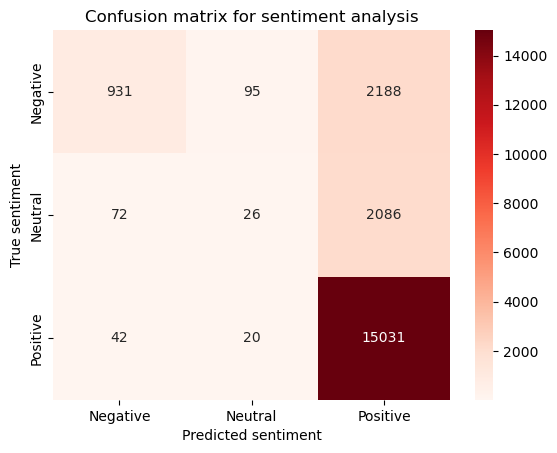

In [38]:
# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.title('Confusion matrix for sentiment analysis')
plt.show()

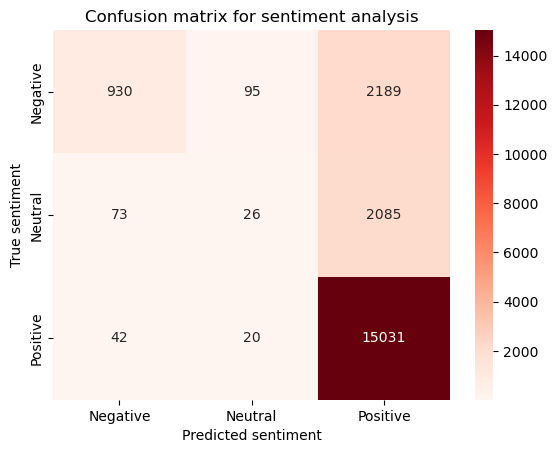

In [128]:
# Create a subset of the confusion matrix for the relevant sentiment categories
relevant_labels = ['Negative', 'Neutral', 'Positive']
subset_conf_mat = conf_mat[3:, :3]  # Extract the first 3 rows and columns

# Create heatmap for the subset confusion matrix
sns.heatmap(subset_conf_mat, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.title('Confusion matrix for sentiment analysis')
plt.show()


In [39]:

report = classification_report(data2['True_Sentiment'], data2['Predicted_Sentiment'])
print(report)

              precision    recall  f1-score   support

    negative       0.89      0.29      0.44      3214
     neutral       0.18      0.01      0.02      2184
    positive       0.78      1.00      0.87     15093

    accuracy                           0.78     20491
   macro avg       0.62      0.43      0.44     20491
weighted avg       0.73      0.78      0.71     20491



In [40]:
report = classification_report(data2['True_Sentiment'], data2['Predicted_Sentiment'], zero_division=1)
print(report)


              precision    recall  f1-score   support

    negative       0.89      0.29      0.44      3214
     neutral       0.18      0.01      0.02      2184
    positive       0.78      1.00      0.87     15093

    accuracy                           0.78     20491
   macro avg       0.62      0.43      0.44     20491
weighted avg       0.73      0.78      0.71     20491



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Find unique labels in both predicted and true sentiment
unique_labels = np.unique(np.concatenate((data2['True_Sentiment'], data2['Predicted_Sentiment'])))

# Create classification report with zero_division parameter
report = classification_report(data2['True_Sentiment'], data2['Predicted_Sentiment'], zero_division=1, labels=unique_labels)
print(report)


# Prediction of Rating

In [42]:
#Define function for new column sentiment

positive = [4, 5]
neutral = [3]
negative = [1, 2]

def map_sentiment(rating):
    if rating in positive:
        return 2
    elif rating in neutral:
        return 1
    else:
        return 0
    
data['Sentiment'] = data['Rating'].apply(map_sentiment)

In [48]:
# Clean the review text as done before
data['Cleaned_Review'] = data['Review'].apply(clean_text)

# Create TF-IDF vectorizer
vect = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, tokenizer = word_tokenize)  # we can adjust max_features as needed

# Split the data into train and test sets
X = vect.fit_transform(data['Cleaned_Review'])  # Features
y = data['Sentiment']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)


# Random Forest

In [54]:
# Build the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on the test set
pred_rf = rf.predict(X_test)

# Evaluate the model: Calculate accuracy 
accuracy_rf = accuracy_score(y_test, pred_rf)

#print classification report
print('Accuracy:', accuracy_rf)
print('Classification Report:')
print(classification_report(y_test, pred_rf))

Accuracy: 0.8036306851454226
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.47      0.61       810
           1       1.00      0.01      0.01       565
           2       0.80      1.00      0.89      3748

    accuracy                           0.80      5123
   macro avg       0.89      0.49      0.50      5123
weighted avg       0.83      0.80      0.75      5123



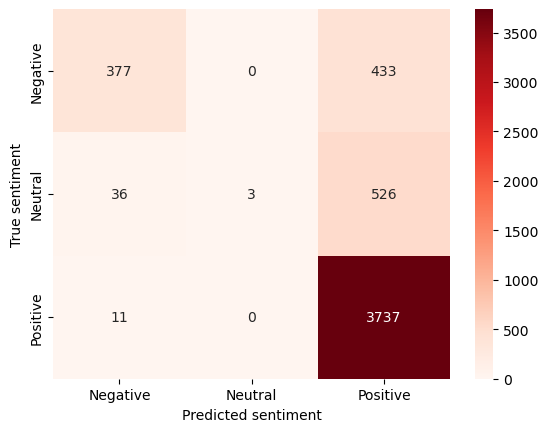

In [55]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, pred_rf)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

# Naive Bayes Multinominal

In [56]:
# Build the model: train a simple classifier (e.g., Naive Bayes)
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict on the test set
pred_nb = nb.predict(X_test)

# Evaluate the model: Calculate accuracy  
accuracy_nb = accuracy_score(y_test, pred_nb)

#print classification report
print('Accuracy:', accuracy_nb)
print('Classification Report:')
print(classification_report(y_test, pred_nb))


Accuracy: 0.8208081202420456
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       810
           1       1.00      0.00      0.00       565
           2       0.82      0.99      0.90      3748

    accuracy                           0.82      5123
   macro avg       0.88      0.53      0.53      5123
weighted avg       0.84      0.82      0.77      5123



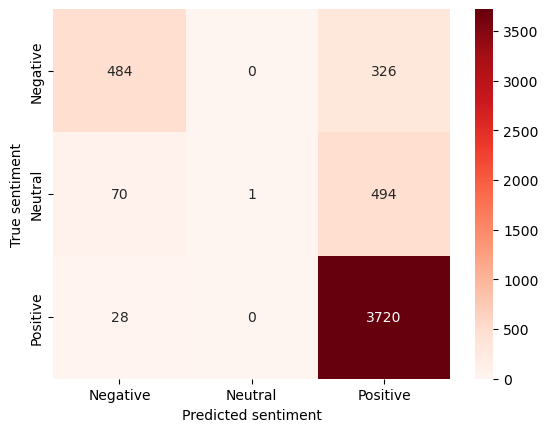

In [57]:
# Confusion matrix
cm_nb = confusion_matrix(y_test, pred_nb)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_nb, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

# XGBoost

In [58]:
# Build the model
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

# Predict on the test set
pred_xgb = xgb.predict(X_test)

# Evaluate the model: Calculate accuracy 
accuracy_xgb = accuracy_score(y_test, pred_xgb)

#print classification report 
print('Accuracy:', accuracy_xgb)
print('Classification Report:')
print(classification_report(y_test, pred_xgb))

Accuracy: 0.8360335740776889
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       810
           1       0.52      0.15      0.23       565
           2       0.85      0.98      0.91      3748

    accuracy                           0.84      5123
   macro avg       0.72      0.60      0.62      5123
weighted avg       0.81      0.84      0.81      5123



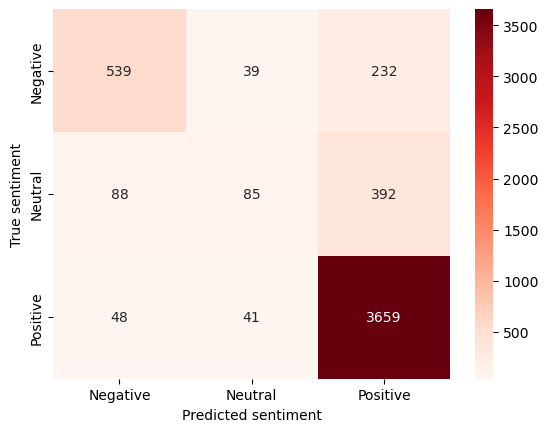

In [59]:
# Confusion matrix
cm_xgb = confusion_matrix(y_test, pred_xgb)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_xgb, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

# Logistic Regression

In [60]:
# Build model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on the test set
pred_lr = lr.predict(X_test)

# Evaluate the model: Calculate accuracy 
accuracy_lr = accuracy_score(y_test, pred_lr)

# print classification report
print('Accuracy:', accuracy_lr)
print('Classification Report:')
print(classification_report(y_test, pred_lr))

Accuracy: 0.8487214522740582
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       810
           1       0.50      0.11      0.18       565
           2       0.87      0.99      0.92      3748

    accuracy                           0.85      5123
   macro avg       0.72      0.61      0.62      5123
weighted avg       0.82      0.85      0.82      5123



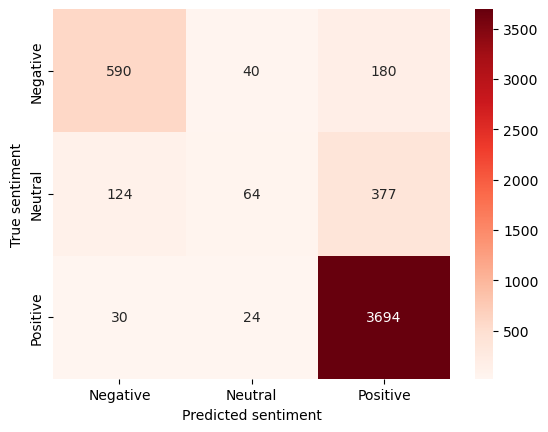

In [61]:
# Confusion matrix
cm_lr = confusion_matrix(y_test, pred_lr)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_lr, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

# Linear Support Vector Classification

In [62]:
# Build model
svc = LinearSVC(random_state=42)
svc.fit(X_train, y_train)

# Predict on the test set
pred_svc = svc.predict(X_test)

# Evaluate the model: Calculate accuracy 
accuracy_svc = accuracy_score(y_test, pred_svc)

#,print classification report
print('Accuracy:', accuracy_svc)
print('Classification Report:')
print(classification_report(y_test, pred_svc))

Accuracy: 0.8481358578957642
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       810
           1       0.42      0.20      0.27       565
           2       0.89      0.97      0.93      3748

    accuracy                           0.85      5123
   macro avg       0.69      0.64      0.65      5123
weighted avg       0.82      0.85      0.83      5123



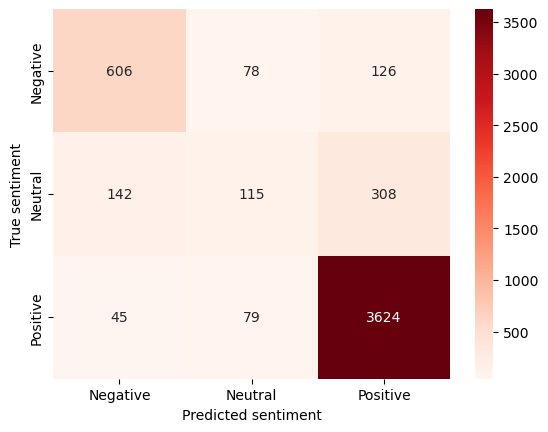

In [63]:
# Confusion matrix
cm_svc = confusion_matrix(y_test, pred_svc)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_svc, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

In [64]:
# Compare models performance
Models = ['Random Forest', 'Naive Bayes Multinominal', 'XGBoost', 'Logistic Regression', 'SVC']
Scores = [accuracy_rf, accuracy_nb, accuracy_xgb, accuracy_lr, accuracy_svc]
performance = pd.DataFrame(list(zip(Models, Scores)), 
                          columns = ['Models', 'Accuracy_score'])\
                            .sort_values('Accuracy_score', ascending=False)
performance

,Models,Accuracy_score
3,Logistic Regression,0.848721
4,SVC,0.848136
2,XGBoost,0.836034
1,Naive Bayes Multinominal,0.820808
0,Random Forest,0.803631


# Text clustering for negative reviews

In [65]:
# Here we focus only negative reviews
data_neg = data[data['Rating'] <= 2]

# Convert text to numerical vectors using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data_neg['Review'])

# Cluster the documents using K-Means algorithm
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1, random_state=0)
kmeans.fit(X)

# Evaluate the performance of the clustering using adjusted Rand index
y_true = data_neg['Rating'].values
y_pred = kmeans.labels_
print('Adjusted Rand index:', adjusted_rand_score(y_true, y_pred))

Adjusted Rand index: 0.01854911836665876


In [66]:
# Reduce the dimensionality of the vectors to 2 using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

In [67]:
# Print the top terms per cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i+1} top terms:", [terms[ind] for ind in order_centroids[i, :10]])
    print('-------')

Cluster 1 top terms: ['room', 'hotel', 'stay', 'night', 'service', 'told', 'desk', 'day', 'time', 'staff']
-------
Cluster 2 top terms: ['hotel', 'room', 'stay', 'location', 'night', 'staff', 'good', 'bed', 'place', 'stayed']
-------
Cluster 3 top terms: ['resort', 'beach', 'food', 'room', 'day', 'pool', 'restaurant', 'time', 'service', 'good']
-------


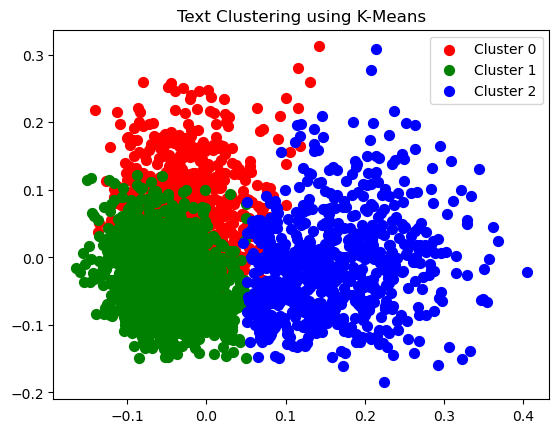

In [68]:
# Plot the clusters
colors = ['red', 'green', 'blue']
for i in range(num_clusters):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], s=50, c=colors[i], label='Cluster {}'.format(i))
plt.legend()
plt.title('Text Clustering using K-Means')
plt.show()

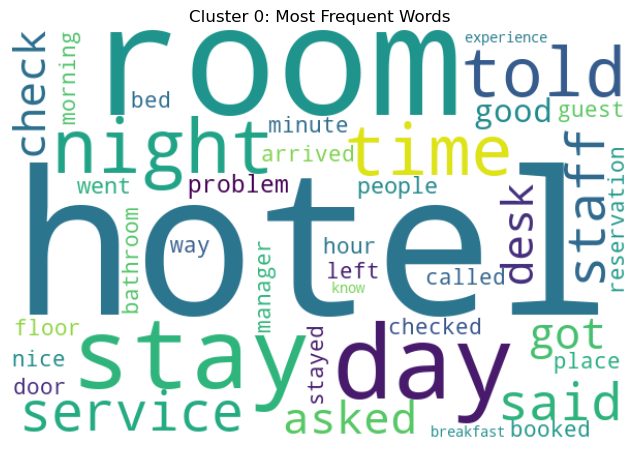

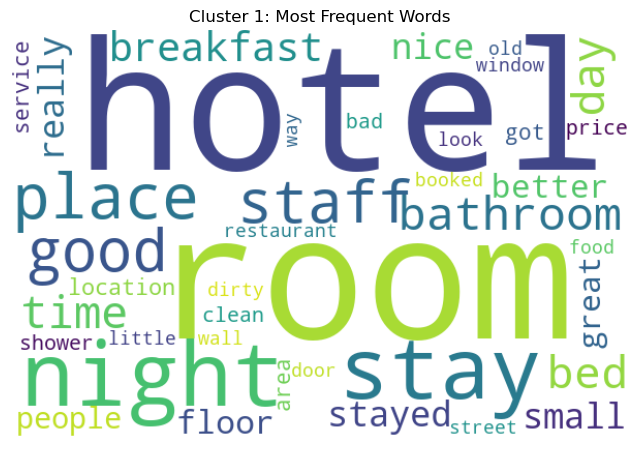

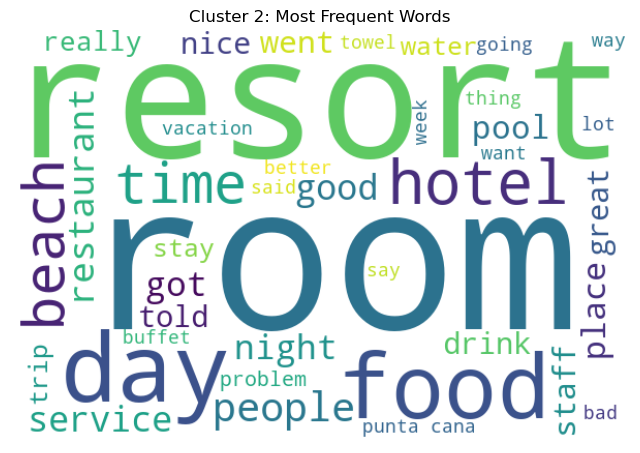

In [69]:
# Get the most frequent words in each cluster
top_words = 40
for i in range(num_clusters):
    cluster_reviews = data_neg['Review'][kmeans.labels_ == i]
    cluster_text = ' '.join(cluster_reviews)
    wordcloud = WordCloud(width=600, height=400, max_words=top_words, background_color='white').generate(cluster_text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Cluster {}: Most Frequent Words'.format(i))
    plt.show()


In [74]:
# Now we focus only positive reviews
data_pos = data[data['Rating'] >= 4 ]

# Convert text to numerical vectors using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data_pos['Review'])

# Cluster the documents using K-Means algorithm
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1, random_state=0)
kmeans.fit(X)

# Evaluate the performance of the clustering using adjusted Rand index
y_true = data_pos['Rating'].values
y_pred = kmeans.labels_
print('Adjusted Rand index:', adjusted_rand_score(y_true, y_pred))

Adjusted Rand index: 0.017818201196687047


In [ ]:
# Reduce the dimensionality of the vectors to 2 using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

In [ ]:
# Print the top terms per cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i+1} top terms:", [terms[ind] for ind in order_centroids[i, :10]])
    print('-------')

In [ ]:
# Get the most frequent words in each cluster
top_words = 40
for i in range(num_clusters):
    cluster_reviews = data_pos['Review'][kmeans.labels_ == i]
    cluster_text = ' '.join(cluster_reviews)
    wordcloud = WordCloud(width=600, height=400, max_words=top_words, background_color='white').generate(cluster_text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Cluster {}: Most Frequent Words'.format(i))
    plt.show()